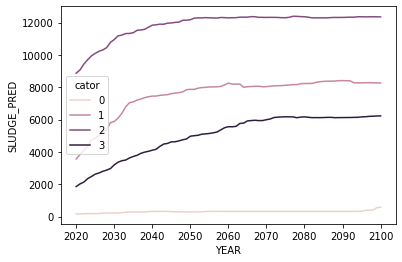

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


Cluster = pd.ExcelFile('Cluster.xlsx').parse('Sheet1')

X = Cluster.drop(['EPROVINCE','SLUDGE_2017'],axis=1)
X = (X-X.min())/(X.max()-X.min())

kmeans = KMeans(n_clusters=4, random_state=2)
result = kmeans.fit_predict(X)

Cluster['cator'] = result


Cluster = Cluster.sort_values(by='cator')


Cluster_results = pd.read_csv('final_result_cluster.csv',encoding='utf-8')
Cluster_results['SLUDGE_PRED'] = Cluster_results['SLUDGE_PRED']/1000
Cluster_results_cat_ssp_year = Cluster_results.groupby(['SSP','YEAR','cator']).sum().reset_index()
Cluster_results_cat_ssp_year_SLUDGE = Cluster_results_cat_ssp_year[['SSP','YEAR','cator','SLUDGE_PRED']]

Cluster_results_cat_ssp_year_SLUDGE = Cluster_results_cat_ssp_year_SLUDGE[Cluster_results_cat_ssp_year_SLUDGE['YEAR']<=2060]

Cluster_results_cat_ssp_year_SLUDGE['SLUDGE_PRED'] = Cluster_results_cat_ssp_year_SLUDGE['SLUDGE_PRED']/1000

sns.lineplot(x='YEAR',y='SLUDGE_PRED',hue='cator',data=Cluster_results_cat_ssp_year[Cluster_results_cat_ssp_year['SSP']=='SSP5'])

sludge_pred_qg = pd.read_csv('sludge_pred_qg.csv', encoding='utf-8')
sludge_pred_qg['SLUDGE_PRED'] = sludge_pred_qg['SLUDGE_PRED']/1000000

sludge_pred_qg = sludge_pred_qg.set_index('YEAR')

YEAR = np.arange(2020,2065,5)

sludge_pred_qg = sludge_pred_qg.loc[YEAR]
sludge_pred_qg = sludge_pred_qg.reset_index()

Cluster_results_cat_ssp_year_SLUDGE = Cluster_results_cat_ssp_year_SLUDGE.set_index('YEAR')
Cluster_results_cat_ssp_year_SLUDGE = Cluster_results_cat_ssp_year_SLUDGE.loc[YEAR]
Cluster_results_cat_ssp_year_SLUDGE = Cluster_results_cat_ssp_year_SLUDGE.reset_index()

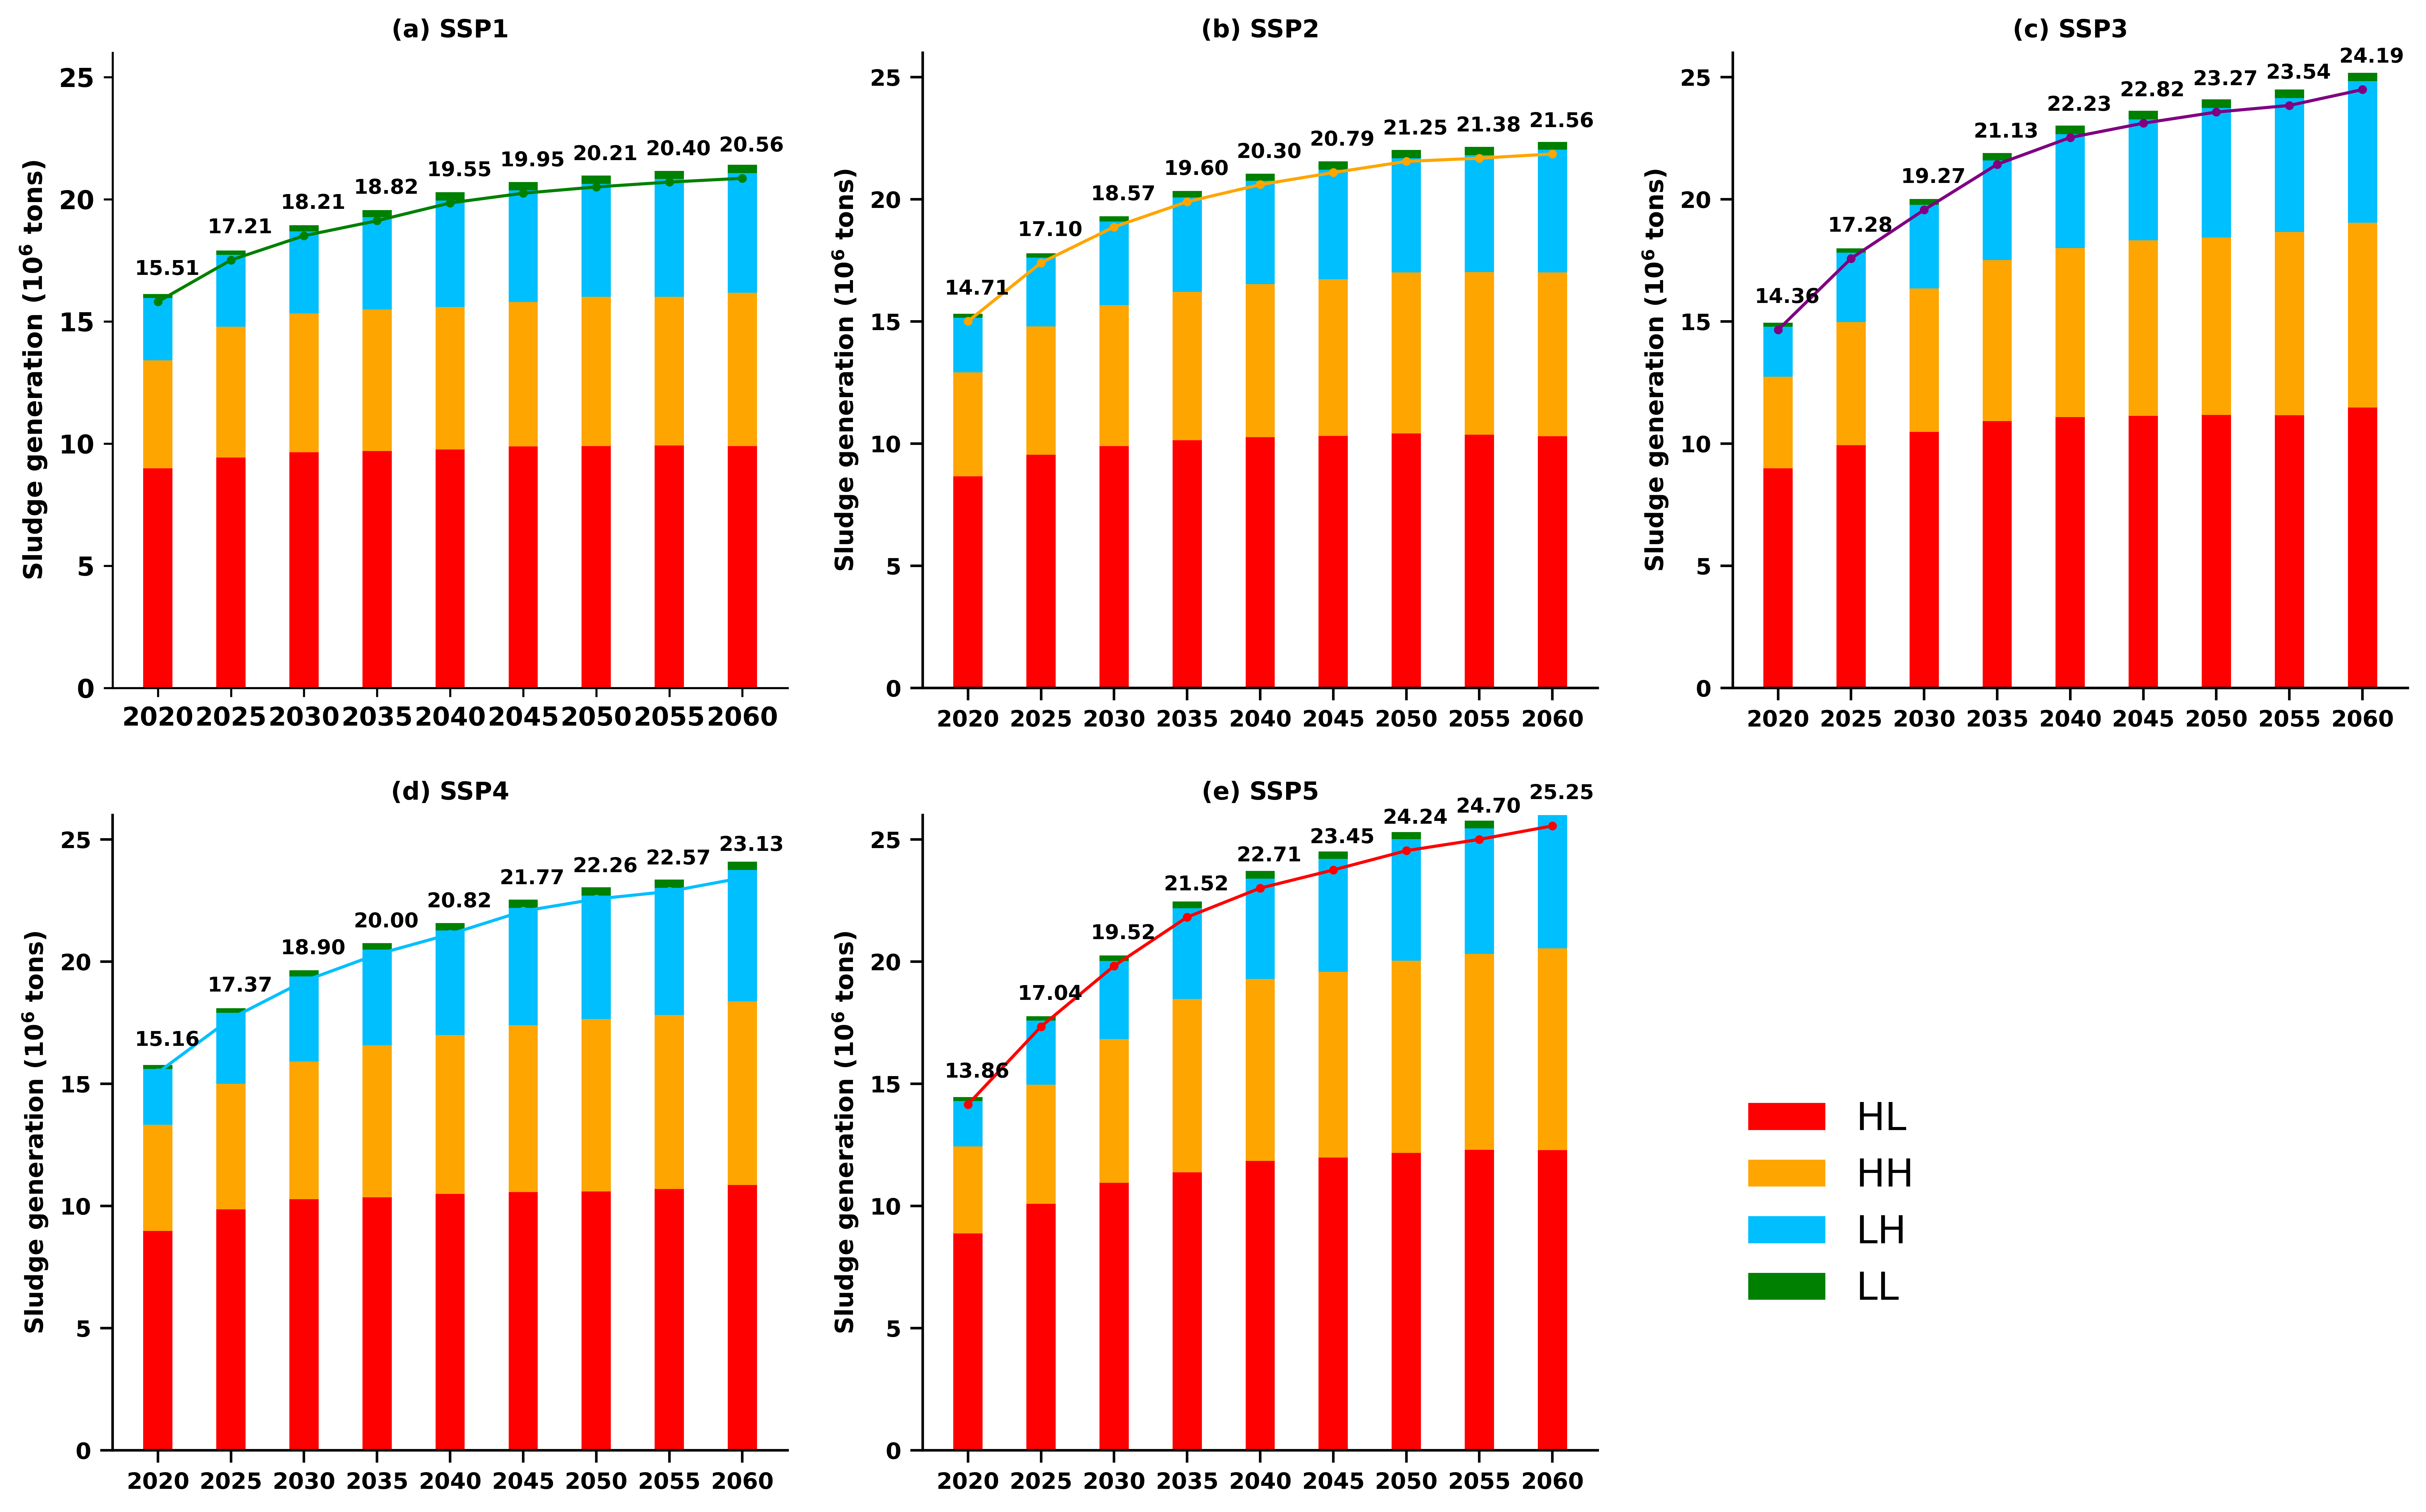

In [2]:
def draw_ssp_qg(df, SSP, number, color):
    sns.set_context("paper")
    width=2
    #plt.rc('font',family='Times New Roman')
    plt.bar(x=df[(df['SSP']==SSP) & (df['cator']==2)]['YEAR'], 
        height=df[(df['SSP']==SSP) & (df['cator']==2)]['SLUDGE_PRED'],
        label='HL', width=width,
        color='red')
    
    plt.bar(x=df[(df['SSP']==SSP) & (df['cator']==1)]['YEAR'], 
        height=df[(df['SSP']==SSP) & (df['cator']==1)]['SLUDGE_PRED'],
        bottom=df[(df['SSP']==SSP) & (df['cator']==2)]['SLUDGE_PRED'],
        color='orange', width=width,
        label='HH')
    
    plt.bar(x=df[(df['SSP']==SSP) & (df['cator']==3)]['YEAR'], 
        height=df[(df['SSP']==SSP) & (df['cator']==3)]['SLUDGE_PRED'],
        bottom=np.array(df[(df['SSP']==SSP) & (df['cator']==1)]['SLUDGE_PRED']) +
        np.array(df[(df['SSP']==SSP) & (df['cator']==2)]['SLUDGE_PRED']),
        color='deepskyblue', width=width,
        label='LH')
    
    
    plt.bar(x=df[(df['SSP']==SSP) & (df['cator']==0)]['YEAR'], 
        height=df[(df['SSP']==SSP) & (df['cator']==0)]['SLUDGE_PRED'],
        bottom=np.array(df[(df['SSP']==SSP) & (df['cator']==1)]['SLUDGE_PRED']) +
        np.array(df[(df['SSP']==SSP) & (df['cator']==2)]['SLUDGE_PRED']) +
        np.array(df[(df['SSP']==SSP) & (df['cator']==3)]['SLUDGE_PRED']),
        color='g', width=width,
        label='LL')
    
    plt.plot(YEAR,
             sludge_pred_qg[(sludge_pred_qg['SSP']==SSP)]['SLUDGE_PRED']+0.3,
             linestyle='-', marker='.',
             color=color)
    
    for x,y in zip(YEAR, sludge_pred_qg[(sludge_pred_qg['SSP']==SSP)]['SLUDGE_PRED']):
        plt.text(x-1.6,y+1.4,'{:.2f}'.format(y), weight='bold',fontsize=8)
        
    plt.ylabel('Sludge generation ($10^6$ tons)', weight='bold')
    plt.ylim(0,26)
    plt.xticks([2020,2025,2030,2035,2040,2045,2050,2055,2060], weight='bold')
    plt.yticks([0,5,10,15,20,25], weight='bold')
    plt.title(number+' '+SSP, weight='bold')
    
    sns.despine()
    
plt.figure(figsize=(16, 10), dpi=600)

plt.subplot(2,3,1)
draw_ssp_qg(Cluster_results_cat_ssp_year_SLUDGE, 'SSP1', '(a)', 'green')

plt.subplot(2,3,2)
draw_ssp_qg(Cluster_results_cat_ssp_year_SLUDGE, 'SSP2', '(b)', 'orange')

plt.subplot(2,3,3)
draw_ssp_qg(Cluster_results_cat_ssp_year_SLUDGE, 'SSP3', '(c)', 'purple')

plt.subplot(2,3,4)
draw_ssp_qg(Cluster_results_cat_ssp_year_SLUDGE, 'SSP4', '(d)', 'deepskyblue')

plt.subplot(2,3,5)
draw_ssp_qg(Cluster_results_cat_ssp_year_SLUDGE, 'SSP5', '(e)', 'red')

plt.legend(loc=(1.2,0.2), frameon=False, fontsize=15)
plt.rcParams.update({'font.weight':'bold'})

#plt.savefig('SSP_qg.jpg',dpi=600, bbox_inches = 'tight')

In [5]:
Cluster_results_2060 = Cluster_results[Cluster_results['YEAR']==2060]
Cluster_results_2060['cator_name'] = 0

for i in Cluster_results_2060.index:
    if Cluster_results_2060.loc[i]['cator'] == 0:
        Cluster_results_2060.loc[i,'cator_name'] = 'LL'
        
        
    elif Cluster_results_2060.loc[i]['cator'] == 1:
        Cluster_results_2060.loc[i,'cator_name'] = 'HH'
        
    elif Cluster_results_2060.loc[i]['cator'] == 2:
        Cluster_results_2060.loc[i,'cator_name'] = 'HL'
    else:
        Cluster_results_2060.loc[i,'cator_name'] = 'LH'
        
def draw_ssp_PRO_2060(df, SSP):
    
    
    #plt.rc('font',family='Times New Roman')
    #plt.figure(figsize=(8, 5), dpi=300)
    sns.set_context("paper")
    colors = ['red','orange', 'deepskyblue', 'green']
    #sns.set(style="white")
    df = df[df['SSP']==SSP]
    df = df.sort_values(by='SLUDGE_PRED', ascending=False)
    
    sns.barplot(x='EPROVINCE', y='SLUDGE_PRED',hue='cator_name',dodge=False, data=df,palette=colors)
    
    plt.xticks(rotation=90)
    plt.xlabel(None)
    #plt.gca().legend().set_title('') 
    plt.legend().remove()
    plt.ylabel('Sludge generation (Kts)', weight='bold')
    
    plt.xticks(fontsize=10,weight='bold')
    plt.yticks(fontsize=10,weight='bold')
    #plt.title(SSP,weight='bold')
    sns.despine()
    #plt.title(SSP)
    
plt.figure(figsize=(20, 12), dpi=600)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.2, hspace=0.45)


plt.subplot(2,3,1)
draw_ssp_PRO_2060(Cluster_results_2060, 'SSP1')
plt.title('(a)SSP1',weight='bold')

plt.subplot(2,3,2)
draw_ssp_PRO_2060(Cluster_results_2060, 'SSP2')
plt.title('(b)SSP2',weight='bold')

plt.subplot(2,3,3)
draw_ssp_PRO_2060(Cluster_results_2060, 'SSP3')
plt.title('(c)SSP3',weight='bold')


plt.subplot(2,3,4)
draw_ssp_PRO_2060(Cluster_results_2060, 'SSP4')
plt.title('(d)SSP4',weight='bold')

plt.subplot(2,3,5)
draw_ssp_PRO_2060(Cluster_results_2060, 'SSP5')
plt.title('(e)SSP5',weight='bold')


#plt.legend(loc=(1.3,0.4),frameon=False, fontsize=22)
plt.rcParams.update({'font.weight':'bold'})
#plt.subplot(2,3,6)

plt.savefig('2060sludge_pro.jpg',dpi=600, bbox_inches = 'tight')

<ipython-input-5-900f8f46fddc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cluster_results_2060['cator_name'] = 0
/Users/oo/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [28]:
Cluster_results_2060_cluster = Cluster_results_2060.groupby(by=['cator_name','SSP']).sum().reset_index()
Cluster_results_2060_cluster['2017_precent'] = Cluster_results_2060_cluster['SLUDGE_2017']/(Cluster_results_2060_cluster['SLUDGE_2017'].sum()/5)

Cluster_results_2060_cluster = Cluster_results_2060_cluster.drop(['Unnamed: 0','GDP', 'POP', 'CCF', '人均CCF',
       'BA', 'LDP', 'UR', 'FCE_P', 'FCE','Unnamed: 0.1',
       'SSP1_2060', 'SSP2_2060', 'SSP3_2060', 'SSP4_2060', 'SSP5_2060',
       'SLUDGE_2017', 'PSSP1_2060', 'PSSP2_2060', 'PSSP3_2060', 'PSSP4_2060',
       'PSSP5_2060','cator'],axis=1)

Cluster_results_2060_cluster['SSP1_2060'] = Cluster_results_2060_cluster[Cluster_results_2060_cluster['SSP']=='SSP1']['SLUDGE_PRED'].sum()
Cluster_results_2060_cluster['SSP2_2060'] = Cluster_results_2060_cluster[Cluster_results_2060_cluster['SSP']=='SSP2']['SLUDGE_PRED'].sum()
Cluster_results_2060_cluster['SSP3_2060'] = Cluster_results_2060_cluster[Cluster_results_2060_cluster['SSP']=='SSP3']['SLUDGE_PRED'].sum()
Cluster_results_2060_cluster['SSP4_2060'] = Cluster_results_2060_cluster[Cluster_results_2060_cluster['SSP']=='SSP4']['SLUDGE_PRED'].sum()
Cluster_results_2060_cluster['SSP5_2060'] = Cluster_results_2060_cluster[Cluster_results_2060_cluster['SSP']=='SSP5']['SLUDGE_PRED'].sum()

Cluster_results_2060_cluster['SSP1_2060_precent'] = Cluster_results_2060_cluster['SLUDGE_PRED'] / Cluster_results_2060_cluster['SSP1_2060']
Cluster_results_2060_cluster['SSP2_2060_precent'] = Cluster_results_2060_cluster['SLUDGE_PRED'] / Cluster_results_2060_cluster['SSP2_2060']
Cluster_results_2060_cluster['SSP3_2060_precent'] = Cluster_results_2060_cluster['SLUDGE_PRED'] / Cluster_results_2060_cluster['SSP3_2060']
Cluster_results_2060_cluster['SSP4_2060_precent'] = Cluster_results_2060_cluster['SLUDGE_PRED'] / Cluster_results_2060_cluster['SSP4_2060']
Cluster_results_2060_cluster['SSP5_2060_precent'] = Cluster_results_2060_cluster['SLUDGE_PRED'] / Cluster_results_2060_cluster['SSP5_2060']

Cluster_results_2060_cluster

,cator_name,SSP,YEAR,SLUDGE_PRED,2017_precent,SSP1_2060,SSP2_2060,SSP3_2060,SSP4_2060,SSP5_2060,SSP1_2060_precent,SSP2_2060_precent,SSP3_2060_precent,SSP4_2060_precent,SSP5_2060_precent
0,HH,SSP1,14420,5417.738632,0.092293,20560.004705,21556.690802,24190.318247,23129.374865,25254.843999,0.263509,0.251325,0.223963,0.234236,0.214523
1,HH,SSP2,14420,5921.435017,0.092293,20560.004705,21556.690802,24190.318247,23129.374865,25254.843999,0.288007,0.274691,0.244785,0.256014,0.234467
2,HH,SSP3,14420,6574.646491,0.092293,20560.004705,21556.690802,24190.318247,23129.374865,25254.843999,0.319778,0.304993,0.271788,0.284255,0.260332
3,HH,SSP4,14420,6551.760968,0.092293,20560.004705,21556.690802,24190.318247,23129.374865,25254.843999,0.318665,0.303932,0.270842,0.283266,0.259426
4,HH,SSP5,14420,7087.462125,0.092293,20560.004705,21556.690802,24190.318247,23129.374865,25254.843999,0.344721,0.328782,0.292988,0.306427,0.280638
5,HL,SSP1,22660,9900.020797,0.784460,20560.004705,21556.690802,24190.318247,23129.374865,25254.843999,0.481518,0.459255,0.409256,0.428028,0.392005
6,HL,SSP2,22660,10304.827424,0.784460,20560.004705,21556.690802,24190.318247,23129.374865,25254.843999,0.501207,0.478034,0.425990,0.445530,0.408034
7,HL,SSP3,22660,11475.720188,0.784460,20560.004705,21556.690802,24190.318247,23129.374865,25254.843999,0.558157,0.532351,0.474393,0.496153,0.454397
8,HL,SSP4,22660,10857.490659,0.784460,20560.004705,21556.690802,24190.318247,23129.374865,25254.843999,0.528088,0.503671,0.448836,0.469424,0.429917
9,HL,SSP5,22660,12289.245312,0.784460,20560.004705,21556.690802,24190.318247,23129.374865,25254.843999,0.597726,0.570090,0.508023,0.531326,0.486609


In [27]:
def draw_ssp_qg(df, SSP, number, color):
    sns.set_context("paper")
    width=2
    #plt.rc('font',family='Times New Roman')
    plt.bar(x=df[(df['SSP']==SSP) & (df['cator']==2)]['YEAR'], 
        height=df[(df['SSP']==SSP) & (df['cator']==2)]['SLUDGE_PRED'],
        label='HL', width=width,
        color='red')
    
    plt.bar(x=df[(df['SSP']==SSP) & (df['cator']==1)]['YEAR'], 
        height=df[(df['SSP']==SSP) & (df['cator']==1)]['SLUDGE_PRED'],
        bottom=df[(df['SSP']==SSP) & (df['cator']==2)]['SLUDGE_PRED'],
        color='orange', width=width,
        label='HH')
    
    plt.bar(x=df[(df['SSP']==SSP) & (df['cator']==3)]['YEAR'], 
        height=df[(df['SSP']==SSP) & (df['cator']==3)]['SLUDGE_PRED'],
        bottom=np.array(df[(df['SSP']==SSP) & (df['cator']==1)]['SLUDGE_PRED']) +
        np.array(df[(df['SSP']==SSP) & (df['cator']==2)]['SLUDGE_PRED']),
        color='deepskyblue', width=width,
        label='LH')
    
    
    plt.bar(x=df[(df['SSP']==SSP) & (df['cator']==0)]['YEAR'], 
        height=df[(df['SSP']==SSP) & (df['cator']==0)]['SLUDGE_PRED'],
        bottom=np.array(df[(df['SSP']==SSP) & (df['cator']==1)]['SLUDGE_PRED']) +
        np.array(df[(df['SSP']==SSP) & (df['cator']==2)]['SLUDGE_PRED']) +
        np.array(df[(df['SSP']==SSP) & (df['cator']==3)]['SLUDGE_PRED']),
        color='g', width=width,
        label='LL')
    
    plt.plot(YEAR,
             sludge_pred_qg[(sludge_pred_qg['SSP']==SSP)]['SLUDGE_PRED']+0.3,
             linestyle='-', marker='.',
             color=color)
    
    for x,y in zip(YEAR, sludge_pred_qg[(sludge_pred_qg['SSP']==SSP)]['SLUDGE_PRED']):
        plt.text(x-1.6,y+1.4,'{:.2f}'.format(y), weight='bold',fontsize=8)
        
    plt.ylabel('Sludge generation ($10^6$ tons)', weight='bold')
    plt.ylim(0,26)
    plt.xticks([2020,2025,2030,2035,2040,2045,2050,2055,2060], weight='bold')
    plt.yticks([0,5,10,15,20,25], weight='bold')
    plt.title(number+' '+SSP, weight='bold')
    
    sns.despine()
    
plt.figure(figsize=(16, 10), dpi=600)

plt.subplot(2,3,1)
draw_ssp_qg(Cluster_results_cat_ssp_year_SLUDGE, 'SSP1', '(a)', 'green')

plt.subplot(2,3,2)
draw_ssp_qg(Cluster_results_cat_ssp_year_SLUDGE, 'SSP2', '(b)', 'orange')

plt.subplot(2,3,3)
draw_ssp_qg(Cluster_results_cat_ssp_year_SLUDGE, 'SSP3', '(c)', 'purple')

plt.subplot(2,3,4)
draw_ssp_qg(Cluster_results_cat_ssp_year_SLUDGE, 'SSP4', '(d)', 'deepskyblue')

plt.subplot(2,3,5)
draw_ssp_qg(Cluster_results_cat_ssp_year_SLUDGE, 'SSP5', '(e)', 'red')

plt.legend(loc=(1.2,0.2), frameon=False, fontsize=15)
plt.rcParams.update({'font.weight':'bold'})

#plt.savefig('SSP_qg.jpg',dpi=600, bbox_inches = 'tight')

,cator_name,SSP,YEAR,SLUDGE_PRED,2017_precent,SSP1_2060,SSP2_2060,SSP3_2060,SSP4_2060,SSP5_2060,SSP1_2060_precent,SSP2_2060_precent,SSP3_2060_precent,SSP4_2060_precent,SSP5_2060_precent
0,HH,SSP1,14420,5417.738632,0.092293,20560.004705,21556.690802,24190.318247,23129.374865,25254.843999,0.263509,0.251325,0.223963,0.234236,0.214523
1,HH,SSP2,14420,5921.435017,0.092293,20560.004705,21556.690802,24190.318247,23129.374865,25254.843999,0.288007,0.274691,0.244785,0.256014,0.234467
2,HH,SSP3,14420,6574.646491,0.092293,20560.004705,21556.690802,24190.318247,23129.374865,25254.843999,0.319778,0.304993,0.271788,0.284255,0.260332
3,HH,SSP4,14420,6551.760968,0.092293,20560.004705,21556.690802,24190.318247,23129.374865,25254.843999,0.318665,0.303932,0.270842,0.283266,0.259426
4,HH,SSP5,14420,7087.462125,0.092293,20560.004705,21556.690802,24190.318247,23129.374865,25254.843999,0.344721,0.328782,0.292988,0.306427,0.280638
5,HL,SSP1,22660,9900.020797,0.784460,20560.004705,21556.690802,24190.318247,23129.374865,25254.843999,0.481518,0.459255,0.409256,0.428028,0.392005
6,HL,SSP2,22660,10304.827424,0.784460,20560.004705,21556.690802,24190.318247,23129.374865,25254.843999,0.501207,0.478034,0.425990,0.445530,0.408034
7,HL,SSP3,22660,11475.720188,0.784460,20560.004705,21556.690802,24190.318247,23129.374865,25254.843999,0.558157,0.532351,0.474393,0.496153,0.454397
8,HL,SSP4,22660,10857.490659,0.784460,20560.004705,21556.690802,24190.318247,23129.374865,25254.843999,0.528088,0.503671,0.448836,0.469424,0.429917
9,HL,SSP5,22660,12289.245312,0.784460,20560.004705,21556.690802,24190.318247,23129.374865,25254.843999,0.597726,0.570090,0.508023,0.531326,0.486609
